In [71]:
import numpy as np
import math
import pandas as pd
from Genetic import GA
from scipy.optimize import minimize, Bounds
from scipy.optimize import OptimizeResult
import matplotlib.pyplot as plt
import sys
import time

### Определим функции

In [3]:
# Функция Растригина
def rastrigin_function(X):

    dim=len(X)         

    OF=0
    for i in range (0,dim):
        OF+=(X[i]**2)-10*math.cos(2*math.pi*X[i])+10

    return OF

def sphere(X):
    return sum(x**2)

rastrigin_varbound=np.array([[-5.12,5.12]]*2)

In [4]:
from statistics import mean
from statistics import variance

def f1(X):
    res = rastrigin_function(X)
    return res 

In [5]:
def progress(count, total, status=''):
    bar_len = 50
    filled_len = int(round(bar_len * count / float(total)))

    percents = round(100.0 * count / float(total), 1)
    bar = '|' * filled_len + '_' * (bar_len - filled_len)

    sys.stdout.write('\r%s %s%s/%s %s' % (status, bar, count, total, 'итераций'))
    sys.stdout.flush()  

### Найдем математическое ожидание и дисперсию для финального значения функции соответствия

#### 1. Для алгоритма оптимизации. В качестве значений начальных координат будет взят промежуток от 0.05 до 0.5

In [6]:
# Функция, которая будет вызываться при каждой итерации
def callbackF1(X):    
    function_results.append(f1(X))

In [75]:
xs = []
for i in range(5, 55, 5):
    for y in range(5, 55, 5):
        xs.append([i / 100.00, y / 100.00])

total_runs = len(xs)
opt_values = []
opt_times = []
progress(0, total_runs, "Прогресс: ")

for i in range(total_runs):
    function_results = []
    start = time.time()
    model = minimize(f1, xs[i], method='SLSQP', bounds=rastrigin_varbound, callback=callbackF1)
    stop = time.time()
    opt_values.append(function_results[-1])
    opt_times.append(stop - start)
    progress(i + 1, total_runs, "Прогресс: ")    

print("\nМатематическое ожидание: ", mean(opt_values))
print("Дисперсия: ", variance(opt_values))

Прогресс:  ||||||||||||||||||||||||||||||||||||||||||||||||||100/100 итераций
Математическое ожидание:  1.8721204119018446
Дисперсия:  3.5114596092066215


#### 2. Для генетического алгоритма

In [64]:
algorithm_param = {'max_num_iteration': 70,
                   'population_size': 70,
                   'mutation_probability': 0.4,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.7,
                   'parents_portion': 0.3,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}

model=GA(function=f1,
         dimension=2,
         variable_type='real',
         variable_boundaries=rastrigin_varbound,
         progress_bar=False, 
         convergence_curve=False,
         algorithm_parameters=algorithm_param)

total_runs = 100
ga_values = []
ga_times = []
progress(1, total_runs, "Прогресс: ")

for i in range(total_runs):
    start = time.time()
    model.run()
    stop = time.time()
    ga_values.append(model.best_function)
    ga_times.append(stop - start)
    progress(i + 1, total_runs, "Прогресс: ")
    
print("\nЗначение математического ожидания: ", mean(ga_values))   
print("Значение дисперсии: ", variance(ga_values))

Прогресс:  ||||||||||||||||||||||||||||||||||||||||||||||||||100/100 итераций
Значение математического ожидания:  0.014255321124344125
Значение дисперсии:  0.000968891972560161


### Определим время, требуемое для получения априори известного значения глобального экстремума оптимизируемой функции

In [7]:
# Функция для поиска априори известного значения
def f2(X):
    res = rastrigin_function(X)
    if res < 0.001:
        res = 0
    return res

К сожалению, GA не находит точное значение экстремума (значение имеет погрешность около 0,01), поэтому в функции f2 априорное значение определено как промежуток вещественных чисел от 0 до 0,001

In [14]:
algorithm_param = {'max_num_iteration': 150,
                   'population_size': 100,
                   'mutation_probability': 0.2,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.3,
                   'parents_portion': 0.4,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': 2}

model=GA(function=f2,
         dimension=2,
         variable_type='real',
         variable_boundaries=rastrigin_varbound,
         progress_bar=False, 
         convergence_curve=False,
         algorithm_parameters=algorithm_param)
result = 1
while int(result) != 0:
    start = time.time()
    model.run()
    stop = time.time()
    result = model.best_function
print("\n\nВремя: ",stop - start,"секунд")



Время:  2.2468948364257812 секунд


In [16]:
x0 = [0.2,0.2]
result = 1
while int(result) != 0:
    is_zero = False
    start = time.time()
    model = minimize(f2, x0, method='SLSQP', bounds=rastrigin_varbound)
    stop = time.time()
    result = model.fun
print("Время: ",stop - start,"секунд")

Время:  0.0029993057250976562 секунд


### Оценить время нахождения последнего (возможно, локального) экстремума функции соответствия (целевой функции) 

In [26]:
class Params:
    
    @staticmethod
    def reset():
        Params.result = -1
        Params.f3_stop = time.time()
        Params.generation = 0
        Params.current_generation = 0
    
    @staticmethod
    def save(res, stop, cur_gen):
        Params.result = res
        Params.f3_stop = stop
        Params.current_generation = cur_gen
    
    @staticmethod
    def save_generation(gen):
        Params.generation = gen
    
    @staticmethod
    def get_generation():
        return Params.generation
    
    @staticmethod
    def get_result():
        return Params.result
    
    @staticmethod
    def get_stop():
        return Params.f3_stop
    
    @staticmethod
    def get_current_generation():
        return Params.current_generation

Params.reset()    
    
def f3(X):    
    res = rastrigin_function(X)
    Params.save_generation(Params.get_generation() + 1) # Увеличиваем номер текущего поколения
    
    # Если значение функции лучше, то записываем результат и номер текущего поколения
    if Params.get_result() < 0 or res < Params.get_result(): 
        Params.save(res, time.time(), Params.get_generation())
    return res

In [38]:
algorithm_param = {'max_num_iteration': 150,
                   'population_size': 100,
                   'mutation_probability': 0.2,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.3,
                   'parents_portion': 0.4,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}


model=GA(function=f3,
         dimension=2,
         variable_type='real',
         variable_boundaries=rastrigin_varbound,
         progress_bar=False, 
         convergence_curve=False,
         algorithm_parameters=algorithm_param)

result_generations = [] # Список поколений, в которых было найдено лучшее решение
Params.reset()
total_runs = 100
progress(0, total_runs, "Прогресс: ")

for i in range(total_runs):
    Params.reset()
    start = time.time()
    model.run()
    result_generations.append(Params.get_current_generation())
    progress(i + 1, total_runs, "Прогресс: ")

print("\n\nМатематическое ожидание поколений: ", mean(result_generations))
print("Дисперсия поколений: ", variance(result_generations))

Прогресс:  ||||||||||||||||||||||||||||||||||||||||||||||||||100/100 итераций

Математическое ожидание поколений:  7222.54
Дисперсия поколений:  2744632.452929293


In [56]:
result_generations.sort()
print(result_generations[:5])
print(result_generations[-5:])

[1215, 3056, 3672, 3920, 3944]
[9034, 9040, 9058, 9060, 9078]


### Визуализация

C:\Users\75BD~1\AppData\Local\Temp/ipykernel_13260/503237053.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


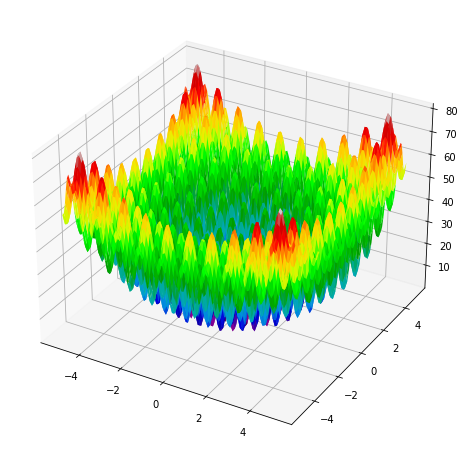

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 
 
X = np.linspace(-5.12, 5.12, 100)
Y = np.linspace(-5.12, 5.12, 100)     
X, Y = np.meshgrid(X, Y) 

Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + \
  (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20

fig = plt.figure(figsize=(8,15)) 
ax = fig.gca(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
  cmap=cm.nipy_spectral, linewidth=0.05,
  antialiased=True)
plt.show()

 The best solution found:                                                                           
 [ 0.0016387  -0.00061022]

 Objective function:
 0.0006066199691741048


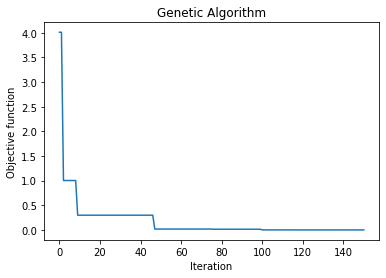

In [61]:
algorithm_param = {'max_num_iteration': 150,
                   'population_size': 100,
                   'mutation_probability': 0.2,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.3,
                   'parents_portion': 0.4,
                   'crossover_type': 'uniform',
                   'max_iteration_without_improv': None}


model=GA(function=f1,
         dimension=2,
         variable_type='real',
         variable_boundaries=rastrigin_varbound,
         progress_bar=True, 
         convergence_curve=True,
         algorithm_parameters=algorithm_param)

model.run()

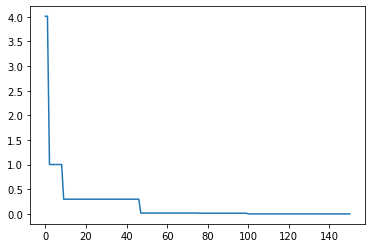

In [62]:
X = range(0, len(model.report), 1)
Y = model.report

plt.plot(X, Y)
plt.show()

In [72]:
# Значения берутся из 100 выполнений генетического алгоритма
results_df = pd.DataFrame([[mean(ga_values), variance(ga_values)],
                          [mean(ga_times), variance(ga_times)]],
                         columns = ['Математическое ожидание', 'Дисперсия'],
                         index = ['Значение целевой функции',
                                 'Время'])
results_df

,Математическое ожидание,Дисперсия
Значение целевой функции,0.014255,0.000969
Время,1.040355,0.024704


In [76]:
# Значения берутся из 100 выполнений генетического алгоритма
results_df = pd.DataFrame([[mean(opt_values), variance(opt_values)],
                          [mean(opt_times), variance(opt_times)]],
                         columns = ['Математическое ожидание', 'Дисперсия'],
                         index = ['Значение целевой функции',
                                 'Время'])
results_df

,Математическое ожидание,Дисперсия
Значение целевой функции,1.872120,3.511460e+00
Время,0.002841,6.818032e-07
